In [1]:
# Run in python console
import nltk; nltk.download('stopwords')
import spacy
from spacy.lang.zh.stop_words import STOP_WORDS
stop_words = spacy.lang.zh.stop_words.STOP_WORDS

from spacy.lang.zh.examples import sentences 
# Run in terminal or command prompt

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\onrik/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 预处理

In [2]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
# import pyLDAvis.gensim  # don't skip this
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [3]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [4]:
import pandas as pd
import urllib.request
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import jieba
import pandas as pd
import re
import csv
# 创建停用词列表
def stopwordslist():
    stopwords = [line.strip() for line in open('chinsesstoptxt.txt',encoding='UTF-8').readlines()]
    return stopwords

# 对句子进行中文分词
def seg_depart(sentence):
    # 对文档中的每一行进行中文分词
    jieba.load_userdict('保留词.txt')
    sentence_depart = jieba.cut(sentence.strip())
    # 创建一个停用词列表
    stopwords = stopwordslist()
    # 输出结果为outstr
    outstr = ''
    # 去停用词
    for word in sentence_depart:
        if word not in stopwords:
            if word != '\t':
                outstr += word
                outstr += " "
    return outstr

def chinese_word_cut(line):
#     line = processing(line[1])
    line = line.replace(' ','')
    line_seg = seg_depart(line)
    return line_seg

df = pd.read_excel("C:/Users/onrik\\report\\0203_LDA\\weibo 가공.xlsx")
df.columns = ['date','content']
# Remove Emails
df['content'] = df['content'].apply(lambda x: re.sub('\S*@\S*\s?', '', x))

# # Remove new line characters
df['content'] = df['content'].apply(lambda x: re.sub('\s+', ' ', x))

# # Remove distracting single quotes
df['content'] = df['content'].apply(lambda x: re.sub("\'", "", x))
df['Text_cut'] = df.content.apply(chinese_word_cut)
ddf = df
df

Building prefix dict from the default dictionary ...
2022-03-26 15:31:47,007 : DEBUG : Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\onrik\AppData\Local\Temp\jieba.cache
2022-03-26 15:31:47,008 : DEBUG : Loading model from cache C:\Users\onrik\AppData\Local\Temp\jieba.cache
Loading model cost 0.640 seconds.
2022-03-26 15:31:47,648 : DEBUG : Loading model cost 0.640 seconds.
Prefix dict has been built successfully.
2022-03-26 15:31:47,650 : DEBUG : Prefix dict has been built successfully.


,date,content,Text_cut
0,2021-12-09,【#工信部下架豆瓣唱吧等106款APP#】工信部9日通报称，11月3日针对APP超范围、高频...,工信部 下架 豆瓣 唱 106 款 APP 工信部 日 通报 称 11 月 日 APP 超范...
1,2021-12-01,【个人信息被侵犯 取证、维权难题怎么破？】只要个人信息处理者无法证明自己无错，就需要承担责任...,个人信息 侵犯 取证 维权 难题 破 信息处理者 证明 无错 承担责任 很大 程度 减少 维...
2,2021-11-02,详解个人信息保护法，其中还有#AI换脸视频前后对比#，马住慢慢看！ 人民日报的微博视频,详解 个人信息保护法 AI 换脸 视频 马住 慢慢 人民日报 微博 视频
3,2021-11-19,总算更新了。借着最近“私生饭”被追究刑责的案子，再和朋友们具体讨论下《#个人信息保护法#》，...,总算 更新 借着 私生 饭 追究 刑责 案子 朋友 讨论 个人信息保护法 互联网 时代 息息...
4,2022-01-01,【新年献词：法治之“度”】站在新旧交替的时间路口，坚韧的2021已经动容地告诉我们，那一个又...,新年 献词 法治 度 站 新旧交替 时间 路口 坚韧 动容 告诉 名字 一场 一场 告别 努...
...,...,...,...
254,2021-11-01,【部分APP获取信息失败拒绝服务？#因客户拒提供个人信息停止服务属违法#】#买卖个人信息最高...,APP 获取信息 失败 拒绝服务 客户 拒 提供 个人信息 停止 服务 属 违法 买卖 个人...
255,2021-11-01,#个人信息保护法施行会带来什么变化#【快递面单被倒卖，个人信息保护不能留下任何缺口|荔枝时评...,个人信息保护法 施行 带来 变化 快递 面单 倒卖 个人信息 保护 留下 缺口 荔枝 时评 ...
256,2021-11-01,#个人信息保护法#【今天起，个人信息保护有了法律“安全锁”！】#个人信息保护法11月1日起正...,个人信息保护法 个人信息 保护 法律 锁 个人信息保护法 11 月 日起 正式 施行 本法 ...
257,2021-10-31,【#买卖个人信息最高可判7年#】#我国首部个人信息保护法明起实施#。法律专家分析，买卖个人信...,买卖 个人信息 可判 年 我国 首部 个人信息保护法 明 实施 法律 专家 分析 买卖 个人...


In [5]:
data = df.Text_cut.values.tolist()

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[1:2])


[['个人信息', '侵犯', '取证', '维权', '难题', '信息处理者', '证明', '无错', '承担责任', '很大', '程度', '减少', '维权', '障碍', '个人信息保护法', '众多', '个人信息', '权益', '公益', '诉讼', '作出', '赋予', '人民检察院', '法律', '消费者', '组织', '国家', '网信', '部门', '组织', '代表', '消费者', '人民法院', '提起', '民事诉讼', '个人信息保护法', '正式', '施行', 'cctv', '焦点访谈', '微博', '视频']]


In [6]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
# trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
# trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
# print(trigram_mod[bigram_mod[data_words[0]]])

In [7]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

# def make_trigrams(texts):
#     return [trigram_mod[bigram_mod[doc]] for doc in texts]

# def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [8]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en

nlp = spacy.load('zh_core_web_sm')
# Do lemmatization keeping only noun, adj, vb, adv
# data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

# print(data_lemmatized[:1])
data_lemmatized = data_words_bigrams

In [9]:
data_lemmatized

[['工信部',
  '下架',
  '豆瓣',
  'app',
  '工信部',
  '通报',
  'app',
  '超范围_高频',
  '索取_权限',
  '服务',
  '场景_必需',
  '收集',
  '用户',
  '个人信息',
  '欺骗_误导',
  '用户',
  '下载_违规行为',
  '检查',
  '整改',
  'app',
  '公开',
  '通报',
  '尚有',
  'app',
  '我部',
  '整改',
  '通信_管理局',
  '我部',
  '统筹',
  '部署',
  '积极开展',
  'app',
  '技术',
  '检测',
  '尚有',
  'app',
  '整改',
  '豆瓣',
  '下架',
  '个人信息保护法',
  '网络安全',
  '相关',
  '法律',
  '我部',
  '组织',
  '共计',
  'app',
  '下架',
  '相关',
  '商店',
  '通报',
  '发布',
  '组织',
  '名单',
  '应用软件',
  '下架',
  '违规',
  '情节严重',
  '整改',
  'app',
  '属地_通信',
  '管理局',
  '应对',
  'app',
  '运营',
  '主体',
  '依法',
  '予以',
  '行政处罚',
  '工信部',
  '下架',
  'app',
  '工信部',
  '下架',
  '侵害',
  '用户',
  '权益',
  'app'],
 ['个人信息',
  '侵犯',
  '取证',
  '维权',
  '难题',
  '信息处理者',
  '证明',
  '无错',
  '承担责任',
  '很大',
  '程度',
  '减少',
  '维权',
  '障碍',
  '个人信息保护法',
  '众多',
  '个人信息',
  '权益',
  '公益',
  '诉讼',
  '作出',
  '赋予',
  '人民检察院',
  '法律',
  '消费者',
  '组织',
  '国家',
  '网信',
  '部门',
  '组织',
  '代表',
  '消费者',
  '人民法院',
  '提起',
  '民事诉讼',
  '个人信息保护法',
 

### TF-IDF

In [10]:
### Term-Frequency
from collections import Counter
words = ''
for i in range(len(data_lemmatized)):
    t = ' '.join(data_lemmatized[i])
    words += t
words = words.split()
counts = Counter(words)
counts

Counter({'工信部': 54,
         '下架': 65,
         '豆瓣': 28,
         'app': 190,
         '通报': 29,
         '超范围_高频': 10,
         '索取_权限': 14,
         '服务': 42,
         '场景_必需': 10,
         '收集': 84,
         '用户': 115,
         '个人信息': 275,
         '欺骗_误导': 10,
         '下载_违规行为': 9,
         '检查': 9,
         '整改': 38,
         '公开': 30,
         '尚有': 12,
         '我部': 8,
         '通信_管理局': 7,
         '统筹': 3,
         '部署': 4,
         '积极开展': 5,
         '技术': 27,
         '检测': 13,
         '个人信息保护法': 260,
         '网络安全': 34,
         '相关': 67,
         '法律': 95,
         '组织': 34,
         '共计': 5,
         '商店': 25,
         '发布': 24,
         '名单': 5,
         '应用软件': 4,
         '违规': 23,
         '情节严重': 7,
         '属地_通信': 6,
         '管理局': 11,
         '应对': 13,
         '运营': 16,
         '主体': 9,
         '依法': 18,
         '予以': 17,
         '行政处罚': 8,
         '侵害': 18,
         '权益': 28,
         'app个人信息': 1,
         '侵犯': 25,
         '取证': 1,
         '维权

In [11]:
vocab = sorted(counts, key=counts.get, reverse=True)
tf_df = []
for voca in vocab:
    tf_df.append({'word': voca, 'term frequency': counts[voca]})
tf_df = pd.DataFrame(tf_df)
tf_df.head(10)

,word,term frequency
0,个人信息,275
1,个人信息保护法,260
2,app,190
3,信息,128
4,保护,126
5,用户,115
6,数据,115
7,法律,95
8,收集,84
9,隐私,83


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
contents_tfidf = []
for i in range(len(data_lemmatized)):
    t = ' '.join(data_lemmatized[i])
    contents_tfidf.append(t)
vectorizer = TfidfVectorizer(max_features= 100)
X = vectorizer.fit_transform(contents_tfidf)

# # TF-IDF 행렬의 크기 확인
# print('TF-IDF 행렬의 크기 :',X.shape)
tf_idfdict=  vectorizer.get_feature_names()
data_array = X.toarray()
data_tdidf = pd.DataFrame(data_array, columns=tf_idfdict)
data_tdidf


,app,下架,个人信息,个人信息保护法,个人隐私,中华人民共和国,中国,予以,互联网,产品,...,违规,通报,部门,银行,销售,门店,隐私,非法,面单,领域
0,0.618301,0.42684,0.040868,0.024088,0.000000,0.000000,0.000000,0.081598,0.000000,0.000000,...,0.075741,0.244795,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
1,0.000000,0.00000,0.260546,0.153570,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.260107,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
2,0.000000,0.00000,0.000000,0.345802,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
3,0.000000,0.00000,0.000000,0.134959,0.000000,0.000000,0.000000,0.000000,0.385398,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
4,0.000000,0.00000,0.055584,0.010921,0.000000,0.000000,0.137351,0.000000,0.000000,0.000000,...,0.068676,0.000000,0.000000,0.0,0.0,0.0,0.027339,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,0.057115,0.00000,0.456789,0.048952,0.000000,0.000000,0.000000,0.000000,0.000000,0.186400,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
255,0.000000,0.00000,0.233729,0.068882,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.172439,0.108292,0.552061,0.0
256,0.000000,0.00000,0.606337,0.079419,0.000000,0.000000,0.000000,0.000000,0.113397,0.151204,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.249716,0.000000,0.0
257,0.000000,0.00000,0.522791,0.061628,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0


In [13]:
def getTFIDF(text_series):
    """Performs TF-IDF calculation on a matrix of words grouped into cells."""
    vectorizer = TfidfVectorizer()

    matrix = vectorizer.fit_transform(text_series).todense()

    matrix_df = pd.DataFrame(matrix, columns=vectorizer.get_feature_names())


    return matrix_df.sum(axis=0).sort_values(ascending=False)

# # Create Corpus for TD-IDF analysis 
text_df = pd.DataFrame()
text_df["text_clean"] = data_lemmatized # Use the data_lemmatized for text analysis
text_to_tfidf = [",".join(text) for text in text_df["text_clean"].values]

# Getting TD-IDF scores for words 
topwords = getTFIDF(text_to_tfidf)
topwords.to_excel("topwords.xlsx")
topwords_50 = topwords[:50]
topwords_50.to_excel("weibo_topwords_tf_idf_50.xlsx")

In [14]:
topwords

个人信息保护法    13.680809
个人信息       12.438274
app        11.438950
保护          8.927729
信息          7.097983
             ...    
花漾          0.030310
财道          0.030310
普象          0.030310
中原          0.030310
开放          0.030310
Length: 3352, dtype: float64

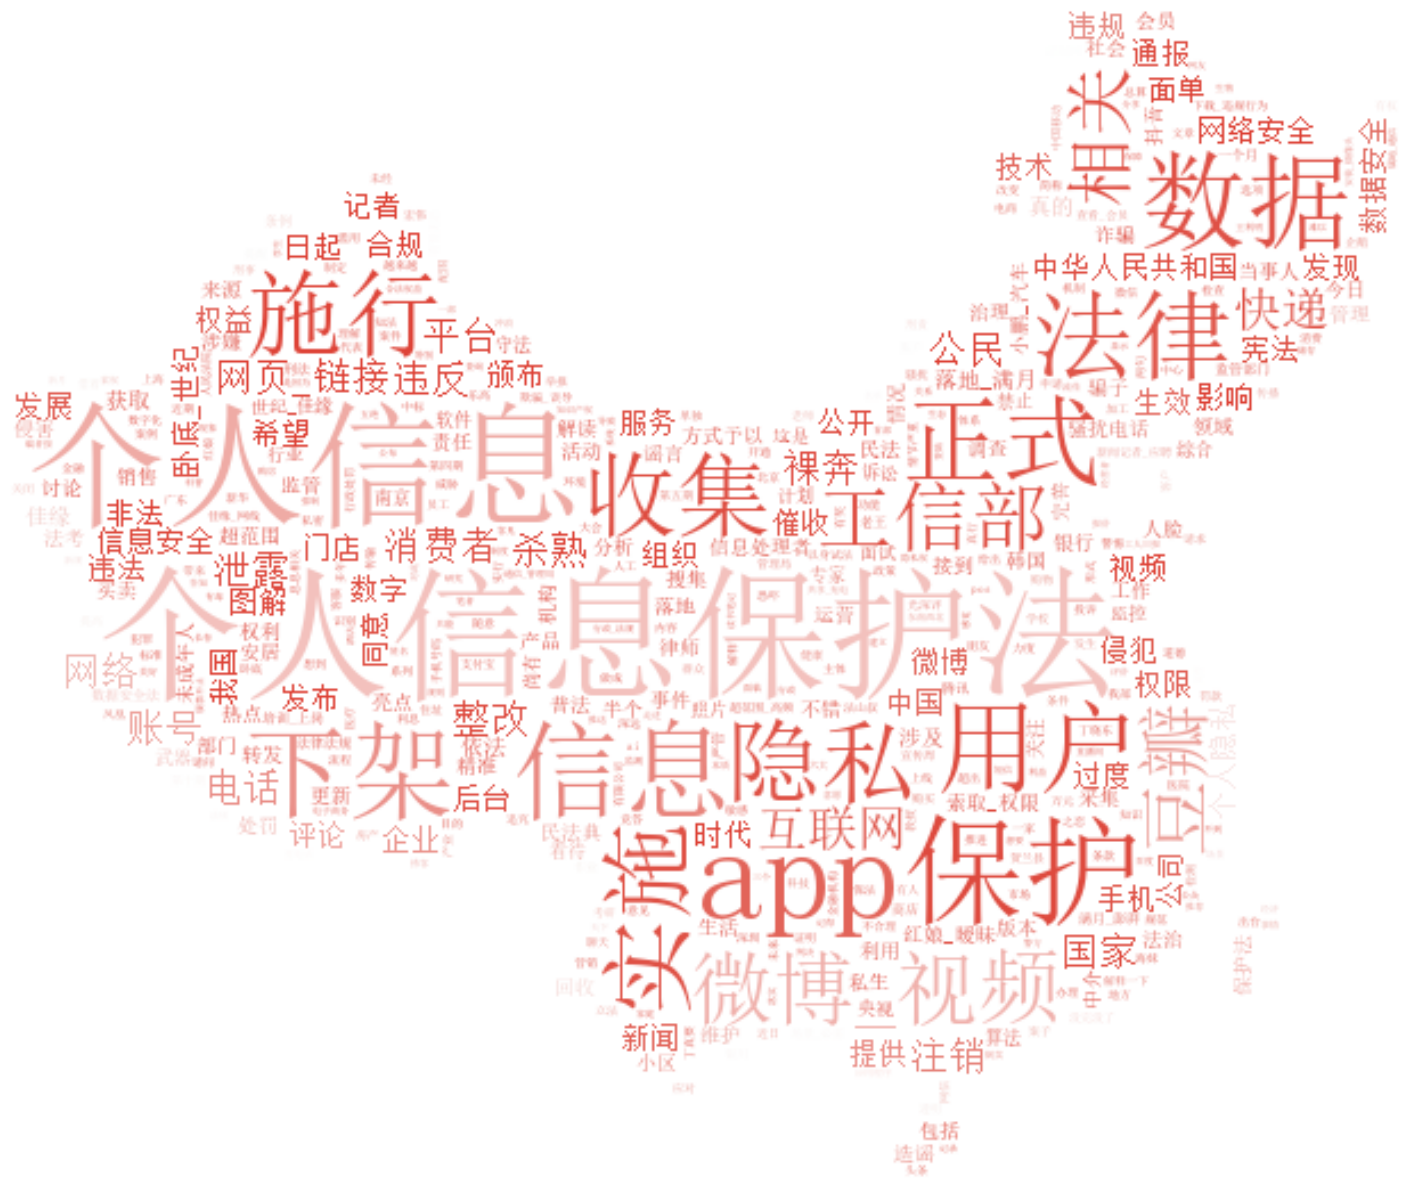

In [15]:
# Importing word cloud
import seaborn as sns
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import matplotlib.colors as mcolors
from PIL import Image

## Creating a masked wordcloud using TD-IDF
fig, ax = plt.subplots(figsize=(25,25))
custom_mask = np.array(Image.open("china2.jpg"))
w = WordCloud(font_path='C:\\Windows\\Fonts\\simsun.ttc',
              background_color = 'white',
              width=800,height=600,
              mask = custom_mask,
              mode='RGBA',
              max_words=2000).fit_words(topwords)
image_colors = ImageColorGenerator(custom_mask)
w.recolor(color_func = image_colors)
plt.imshow(w, interpolation="bilinear")
plt.axis("off")
plt.show()
fig.savefig('weibo_TFIDF_Wordcloud.png', dpi=800)

### LDA

In [17]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 11), (1, 6), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 2), (16, 1), (17, 4), (18, 1), (19, 1), (20, 1), (21, 3), (22, 1), (23, 1), (24, 4), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 3), (32, 2), (33, 1), (34, 1), (35, 1), (36, 2), (37, 1), (38, 1), (39, 1), (40, 2), (41, 1), (42, 1), (43, 1), (44, 1), (45, 3), (46, 1)]]


In [18]:
# Download File: http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
# mallet_path = 'mallet-2.0.8/bin/mallet'  # update this path
# mallet_path = 'path/to/mallet-2.0.8/bin/mallet' # update this path
import os
os.environ.update({'MALLET_HOME':r'C:/Users/onrik/Downloads/mallet-2.0.8/mallet-2.0.8/'})

mallet_path = 'C:/Users/onrik/Downloads/mallet-2.0.8/mallet-2.0.8/bin/mallet' # update this path


# ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=20, id2word=id2word)
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=8, id2word=id2word)

In [19]:
# Show Topics
pprint(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()

[(0,
  [('app', 0.08742514970059881),
   ('下架', 0.04131736526946108),
   ('用户', 0.0407185628742515),
   ('工信部', 0.035329341317365266),
   ('收集', 0.032335329341317366),
   ('相关', 0.02874251497005988),
   ('整改', 0.022754491017964073),
   ('豆瓣', 0.022754491017964073),
   ('组织', 0.01976047904191617),
   ('通报', 0.017964071856287425)]),
 (1,
  [('个人信息保护法', 0.043478260869565216),
   ('公民', 0.024844720496894408),
   ('侵犯', 0.017080745341614908),
   ('法治', 0.016304347826086956),
   ('银行', 0.012422360248447204),
   ('账户', 0.011645962732919254),
   ('真的', 0.010093167701863354),
   ('老王', 0.009316770186335404),
   ('宪法', 0.009316770186335404),
   ('权利', 0.009316770186335404)]),
 (2,
  [('个人信息保护法', 0.16733386709367493),
   ('施行', 0.045636509207365894),
   ('实施', 0.04483586869495596),
   ('正式', 0.044035228182546036),
   ('微博_视频', 0.025620496397117692),
   ('杀熟', 0.01921537229783827),
   ('日起', 0.01521216973578863),
   ('网页_链接', 0.013610888710968775),
   ('利用', 0.012810248198558846),
   ('希望', 0.0120

In [20]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [21]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=30, step=2)

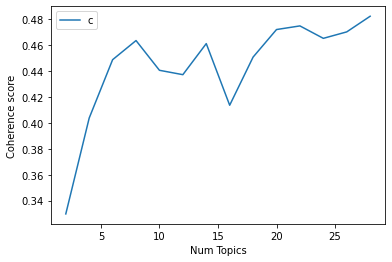

In [22]:
# Show graph
limit=30; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [23]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))
model_list

Num Topics = 2  has Coherence Value of 0.3297
Num Topics = 4  has Coherence Value of 0.4038
Num Topics = 6  has Coherence Value of 0.4489
Num Topics = 8  has Coherence Value of 0.4636
Num Topics = 10  has Coherence Value of 0.4407
Num Topics = 12  has Coherence Value of 0.4373
Num Topics = 14  has Coherence Value of 0.4613
Num Topics = 16  has Coherence Value of 0.4137
Num Topics = 18  has Coherence Value of 0.4509
Num Topics = 20  has Coherence Value of 0.4722
Num Topics = 22  has Coherence Value of 0.475
Num Topics = 24  has Coherence Value of 0.4654
Num Topics = 26  has Coherence Value of 0.4703
Num Topics = 28  has Coherence Value of 0.4824


In [24]:
optimal_model = model_list[3]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=20))

[(0,
  '0.053*"数据" + 0.032*"数字" + 0.024*"数据安全" + 0.024*"网络" + 0.023*"国家" + '
  '0.020*"发展" + 0.019*"法治" + 0.019*"中国" + 0.016*"治理" + 0.015*"社会" + 0.013*"信息" '
  '+ 0.010*"领域" + 0.010*"生活" + 0.010*"时代" + 0.009*"法律法规" + 0.009*"体系" + '
  '0.009*"带来" + 0.008*"管理" + 0.008*"经济" + 0.008*"数据安全法"'),
 (1,
  '0.178*"个人信息" + 0.081*"保护" + 0.048*"法律" + 0.024*"收集" + 0.021*"提供" + '
  '0.021*"同意" + 0.020*"我国" + 0.018*"中华人民共和国" + 0.018*"违法" + 0.017*"正式" + '
  '0.016*"非法" + 0.015*"过度" + 0.014*"网页_链接" + 0.013*"手机" + 0.013*"信息处理者" + '
  '0.012*"日起" + 0.011*"部门" + 0.009*"敏感" + 0.009*"服务" + 0.007*"买卖"'),
 (2,
  '0.141*"个人信息保护法" + 0.037*"实施" + 0.034*"施行" + 0.026*"微博_视频" + 0.023*"正式" + '
  '0.011*"民法典" + 0.010*"责任" + 0.010*"宪法" + 0.009*"微博" + 0.009*"生效" + '
  '0.008*"评论" + 0.008*"力度" + 0.007*"图解" + 0.007*"民法" + 0.006*"热点" + 0.006*"普法" '
  '+ 0.006*"保护法" + 0.006*"颁布" + 0.006*"面试" + 0.006*"未成年人"'),
 (3,
  '0.050*"信息" + 0.026*"记者" + 0.023*"新闻" + 0.019*"公司" + 0.016*"门店" + 0.015*"权限" '
  '+ 0.014*"施行" + 0.014*"销售" +

In [25]:
ldadf = []
for i in range(len(optimal_model.print_topics(num_words= 20))):
    topic = optimal_model.print_topics(num_words= 20)[i]
    topic_num = 'topic' + ' ' + str(i+1)
    for j in range(len(topic[1].split(" + "))):
        term = topic[1].split(" + ")[j].split("*")[1][1:-1]
        ldanum = topic[1].split(" + ")[j].split("*")[0]
        ldadf.append({"topic": topic_num, 'term':term, 'lda_num':ldanum})
ldadf = pd.DataFrame(ldadf)
print(len(ldadf), ldadf.term.nunique())
ldadf

160 144


,topic,term,lda_num
0,topic 1,数据,0.053
1,topic 1,数字,0.032
2,topic 1,数据安全,0.024
3,topic 1,网络,0.024
4,topic 1,国家,0.023
...,...,...,...
155,topic 8,个人信息,0.010
156,topic 8,真的,0.009
157,topic 8,老王,0.009
158,topic 8,条件,0.009


In [26]:
# Visualize the topics
# Plotting tools
import pyLDAvis
# import pyLDAvis.gensim  # don't skip this
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
%matplotlib inline

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(optimal_model, corpus, id2word)
vis

AttributeError: 'LdaMallet' object has no attribute 'inference'

In [27]:
ldadf.to_excel("weibo LDAdf_final2.xlsx", index=False)

In [28]:
def format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,4.0,0.6339,"app, 用户, 下架, 工信部, 相关, 收集, 豆瓣, 整改, 组织, 通报",工信部 下架 豆瓣 唱 106 款 APP 工信部 日 通报 称 11 月 日 APP 超范...
1,1,1.0,0.2274,"个人信息, 保护, 法律, 收集, 提供, 同意, 我国, 中华人民共和国, 违法, 正式",个人信息 侵犯 取证 维权 难题 破 信息处理者 证明 无错 承担责任 很大 程度 减少 维...
2,2,3.0,0.1436,"信息, 记者, 新闻, 公司, 门店, 权限, 销售, 施行, 情况, 裸奔",详解 个人信息保护法 AI 换脸 视频 马住 慢慢 人民日报 微博 视频
3,3,2.0,0.3020,"个人信息保护法, 实施, 施行, 微博_视频, 正式, 民法典, 责任, 宪法, 微博, 生效",总算 更新 借着 私生 饭 追究 刑责 案子 朋友 讨论 个人信息保护法 互联网 时代 息息...
4,4,0.0,0.3276,"数据, 数字, 数据安全, 网络, 国家, 发展, 中国, 法治, 治理, 社会",新年 献词 法治 度 站 新旧交替 时间 路口 坚韧 动容 告诉 名字 一场 一场 告别 努...
5,5,2.0,0.2768,"个人信息保护法, 实施, 施行, 微博_视频, 正式, 民法典, 责任, 宪法, 微博, 生效",2022 新年贺词 新 一年 法 护航 2022 年 第一条 微博 新年 钟声 敲响 告别 ...
6,6,0.0,0.2225,"数据, 数字, 数据安全, 网络, 国家, 发展, 中国, 法治, 治理, 社会",校长 付子堂 年 国家 出台 多部 法律法规 制定 检察官法 检察官 实施 条例 权力 关进...
7,7,2.0,0.2574,"个人信息保护法, 实施, 施行, 微博_视频, 正式, 民法典, 责任, 宪法, 微博, 生效",中国 年鉴 Reform 改革 感受 法治 力量 年 中国 法治 建设 成绩斐然 民法典 数...
8,8,1.0,0.2608,"个人信息, 保护, 法律, 收集, 提供, 同意, 我国, 中华人民共和国, 违法, 正式",违规 收集 个人信息 宁波 25 APP 通报 近期 群众反映 App 非法 获取 超范围 ...
9,9,6.0,0.1971,"个人信息保护法, 平台, 用户, 泄露, 隐私, 信息, 快递, 企业, 互联网, 信息安全",早上好 书摘 精准 广告 中 Cookie 技术 侵犯 用户 隐私权 这项 技术 搜集 包括...


In [29]:
df_dominant_topic.to_excel("weibo_토픽별docu.xlsx",index=False)

### NER

In [30]:
import spacy
from spacy import displacy
import en_core_web_sm

nlp = en_core_web_sm.load()
def NER(lst):
    doc = nlp(lst)
    NERlst = []
    for X in doc.ents:
    #     NERlst.append((X.text, X.label_))
        if X.label_ == 'ORG':
            NERlst.append(X.text)

    return NERlst
qq =  df

qq['content'] = data_words_nostops
nlpdf = qq[['content']]
de_doc = []
for i in range(len(data_words_nostops)):
    t = ' '.join(data_words_nostops[i])
    de_doc.append(t)
qq['content'] = de_doc
nlpdf = qq[['content']]    
nlpdf['NER result'] = nlpdf['content'].apply(lambda x: NER(x))
nlpdf

<ipython-input-30-939e1312cae3>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nlpdf['NER result'] = nlpdf['content'].apply(lambda x: NER(x))


,content,NER result
0,工信部 下架 豆瓣 app 工信部 通报 app 超范围 高频 索取 权限 服务 场景 必需...,[]
1,个人信息 侵犯 取证 维权 难题 信息处理者 证明 无错 承担责任 很大 程度 减少 维权 ...,"[个人信息 侵犯 取证 维权 难题 信息处理者 证明, cctv]"
2,详解 个人信息保护法 ai 换脸 视频 马住 慢慢 人民日报 微博 视频,[]
3,总算 更新 借着 私生 追究 刑责 案子 朋友 讨论 个人信息保护法 互联网 时代 息息相关...,[深远 微博 计划 光深评 法山叔 微博 视频]
4,新年 献词 法治 新旧交替 时间 路口 坚韧 动容 告诉 名字 一场 一场 告别 努力 轻易...,[中央 生态 环境保护 督察]
...,...,...
254,app 获取信息 失败 拒绝服务 客户 提供 个人信息 停止 服务 违法 买卖 个人信息 可...,[倒卖 个人信息 每张 个人信息保护法]
255,个人信息保护法 施行 带来 变化 快递 面单 倒卖 个人信息 保护 留下 缺口 荔枝 时评 ...,[]
256,个人信息保护法 个人信息 保护 法律 个人信息保护法 日起 正式 施行 本法 八章 七十四条...,[]
257,买卖 个人信息 可判 我国 首部 个人信息保护法 实施 法律 专家 分析 买卖 个人信息 可...,[]


In [31]:
from nltk.probability import FreqDist
NERll = nlpdf['NER result'].sum()
fdist = FreqDist(NERll)
top_20 = fdist.most_common(20)
top_20

[('深远 微博 计划 光深评 法山叔 微博 视频', 3),
 ('整改 通信 管理局 积极开展', 3),
 ('平台 索要 会员 照片', 2),
 ('财经大学', 2),
 ('机构 个人信息', 2),
 ('万元 侵犯 公民 个人信息 判处 三年', 2),
 ('数字化', 2),
 ('丁晓东', 2),
 ('头发', 2),
 ('合规性', 2),
 ('专门性', 2),
 ('个人信息 侵犯 取证 维权 难题 信息处理者 证明', 1),
 ('cctv', 1),
 ('中央 生态 环境保护 督察', 1),
 ('可用 保护 商业秘密', 1),
 ('舒尔茨', 1),
 ('派出所 夫妻关系 证明 哭笑不得 这是 社会', 1),
 ('输入', 1),
 ('android', 1),
 ('个人信息保护法 第四章 第四十四条', 1)]